# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [35]:
df= pd.read_csv('data/zillow_data.csv')

In [36]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [37]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [38]:
time = get_datetimes(df)

In [39]:
time

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

# Step 3: EDA and Visualization

In [40]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby(['time','RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']).aggregate({'value':'mean'})

In [ ]:
melt = melt_data(df)

In [ ]:
melt.head()

In [ ]:
melt.isna().values.any()

In [41]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby(['time']).aggregate({'value':'mean'})

In [42]:
df_1 = melt_data(df)

In [43]:
df_1.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


# Step 5: ARIMA Modeling

In [44]:
df_1 = df_1.sample(n=200)

In [45]:
df = df_1

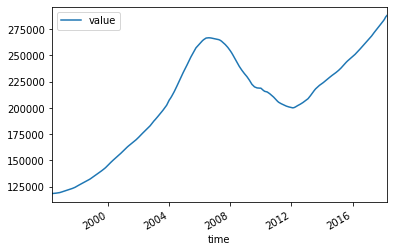

In [50]:
df.index = pd.to_datetime(df.index)
df.plot()

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2004-06-01 to 1997-11-01
Data columns (total 1 columns):
value    200 non-null float64
dtypes: float64(1)
memory usage: 3.1 KB
None


In [ ]:
# # differencing (d)
# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
# plot_acf(df.value, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

In [58]:
data_diff = df.diff().dropna()
data_diff

,value
time,
2001-05-01,-54418.879180
2013-01-01,44028.083334
2016-08-01,49852.464649
2008-01-01,-3202.059061
2002-05-01,-77438.297500
...,...
1999-03-01,-63416.080604
2014-06-01,92469.035579
1999-04-01,-91626.827644


In [ ]:
# # AR (p)
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(df.value.diff().dropna(), ax=axes[1])

# plt.show()

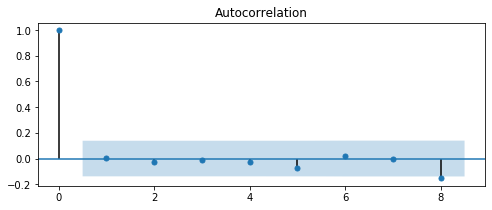

In [53]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df,ax=ax, lags=8);

In [ ]:
# # MA (q)
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(df.value.diff().dropna(), ax=axes[1])

# plt.show()

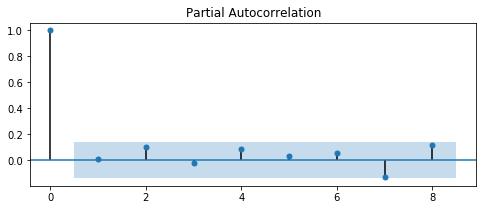

In [23]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(df,ax=ax, lags=8);

In [ ]:
# arima(df, order = p,d,q)

In [128]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Visitor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Visitor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  199
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2699.193
Method:                       css-mle   S.D. of innovations         187505.839
Date:                Tue, 05 May 2020   AIC                           5412.386
Time:                        11:11:01   BIC                           5435.439
Sample:                             1   HQIC                          5421.716
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           147.9351   3445.228      0.043      0.966   -6604.587    6900.457
ar.L1.D.value    -0.9141      0.070    -13.025      0.000      -1.052      -0.777
ar.L2.D.value    -0.8296      0.093     

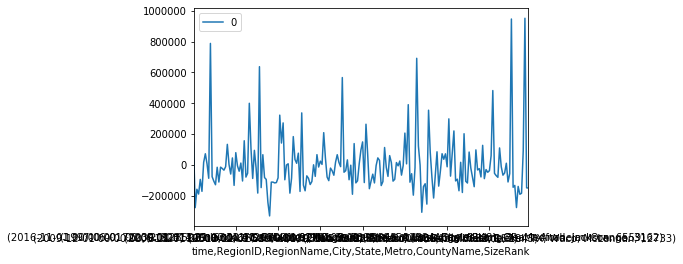

In [129]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

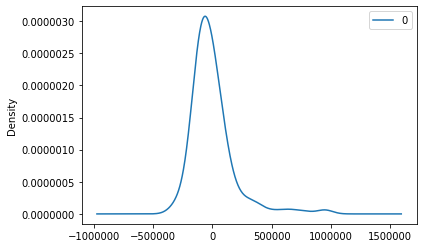

                   0
count     199.000000
mean     -526.450477
std    188532.295872
min   -331682.354889
25%   -106277.235231
50%    -37790.151003
75%     52293.955863
max    951938.840012


In [130]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Step 6: Interpreting Results

predicted=223157.592622, expected=218844.042989
predicted=209758.060662, expected=262687.485771
predicted=224865.838221, expected=202274.412028
predicted=200432.517332, expected=191691.758603
predicted=218959.669675, expected=257204.985714
predicted=247055.761742, expected=255151.628571
predicted=230757.929837, expected=228199.285512
predicted=240101.262096, expected=205118.247572
predicted=219668.410797, expected=201718.705086
predicted=214156.939330, expected=204337.921058
predicted=227875.906890, expected=254820.084222
predicted=233388.111874, expected=219064.356926
predicted=221752.766902, expected=118537.423268
predicted=193043.470295, expected=216704.313344
predicted=204039.576461, expected=119685.084771
predicted=183185.341141, expected=118780.254312
predicted=180156.667290, expected=266695.604630
predicted=191514.077309, expected=218812.231335
predicted=165997.120019, expected=211168.039896
predicted=204280.315459, expected=284368.688447
predicted=196958.225060, expected=261576

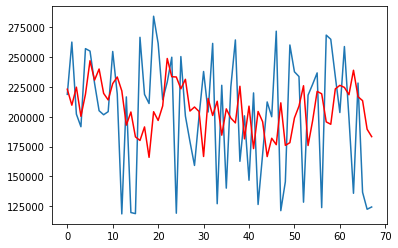

In [62]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()